In [45]:
import pathlib
import os

data_dir = pathlib.Path('../data_for_test/test')

In [46]:
import PIL
from PIL import Image

In [117]:
for i in data_dir.rglob('*'):
    if i.is_file():
#         print(i,i.parent.name)
        print(i)
        print(type(i))
        img = PIL.Image.open(i)
        break

..\data_for_test\test\哀\0.jpg
<class 'pathlib.WindowsPath'>


In [125]:
for i in data_dir.glob('*'):

#         print(i,i.parent.name)
    print(i.name)


哀
哎
唉
啊
埃
挨
皑
阿


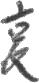

In [56]:
img

In [23]:
from torchvision import transforms

In [151]:
class HWVocab:
    def __init__(self,data_dir):
        self.lables = []
        self.char_dict = {}
        self.initialize_dict(data_dir)
    def initialize_dict(self,path):
        data_dir = pathlib.Path(path)
        for i in data_dir.glob('*'):
            if i not in self.lables:
                self.lables.append(i.name)
        for idx,c in enumerate(self.lables):
            self.char_dict[c] = idx
        print(f"dict initialized successfully,there's {len(self.char_dict)} lables in the dict.")

    
    def __getitem__(self,c):
        return self.char_dict[c]
    
    def lable2char(self,idx):
        return self.lables[idx]

In [152]:
voc_test = HWVocab('../data_for_test/test')

dict initialized successfully,there's 8 lables in the dict.


In [153]:
voc_test['哀']

0

In [154]:
voc_test.lable2char(0)

'哀'

In [164]:
class HWDataset:
    # Hand Writting Dataset
    def __init__(self,data_dir):
        self.transform = transforms.Compose([
            transforms.Resize((48,48)),
            transforms.ToTensor()
        ])
        self.to_img = transforms.ToPILImage()
        self.data_dir = data_dir
        self.vocab = HWVocab(data_dir)
        self.data_list = self.get_data_list()
    def get_data_list(self):
        num_lable = 0
        data_list = []
        data_dir = pathlib.Path(self.data_dir)
        for file in data_dir.rglob('*'):
            if file.is_file():
                lable = self.vocab[file.parent.name]
                img = PIL.Image.open(file)
                feature = self.transform(img)
                data_list.append((lable,feature))
        print(f"lenth of dataset is : {len(data_list)}")
        return data_list
    
    def __len__(self):
        return len(self.data_list)
    
    def __getitem__(self,idx):
        return self.data_list[idx]
    
    def get_img(self,idx):
        item = self.data_list[idx]
        img = self.to_img(item[1])
        return (self.vocab.lable2char(item[0]),img)
    
    

In [165]:
test = HWDataset(data_dir='../data_for_test/test')

dict initialized successfully,there's 8 lables in the dict.
lenth of dataset is : 477


In [166]:
test[0][1].shape

torch.Size([1, 48, 48])

In [168]:
test.get_img(0)

('哀', <PIL.Image.Image image mode=L size=48x48>)

In [169]:
for i in test:
    print(i)
    print(i[1].shape)
    print(i[0])
    break

(0, tensor([[[1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         ...,
         [0.9961, 0.9922, 0.9882,  ..., 0.5922, 0.6824, 0.7255],
         [1.0000, 0.9961, 1.0000,  ..., 0.4510, 0.6078, 0.7647],
         [1.0000, 1.0000, 1.0000,  ..., 0.8235, 0.9020, 0.9765]]]))
torch.Size([1, 48, 48])
0
